In [2]:
# Import necessary modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

# Import data 

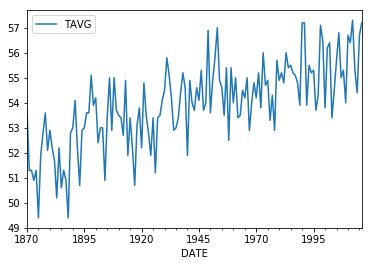

In [3]:
# Read the CSV file into a DataFrame: df
temp_NY= pd.read_csv('NOAA_TAVG.csv',index_col='DATE',parse_dates=True)
# Plot average temperatures
temp_NY.plot()
plt.show()

In [4]:
# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.5832938987871108


# Autocorrelations

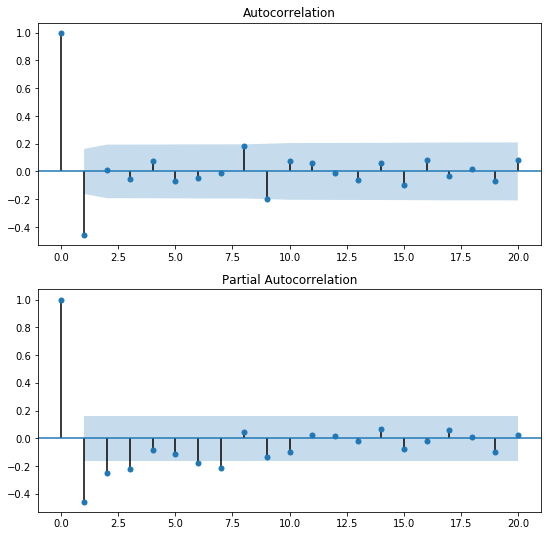

In [13]:
plt.rcParams['figure.figsize'] = (9, 9)
# Take first difference of the temperature Series
chg_temp = temp_NY - temp_NY.shift(1)
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()


# Estimating an ARMA model

In [8]:
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

The AIC for an AR(1) is:  510.5346898313909
The AIC for an AR(2) is:  501.92741231602264
The AIC for an MA(1) is:  469.390968935298
The AIC for an ARMA(1,1) is:  469.0729179535894


# Estimating an ARIMA model

In [9]:
# Forecast interest rates using an ARMA(1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

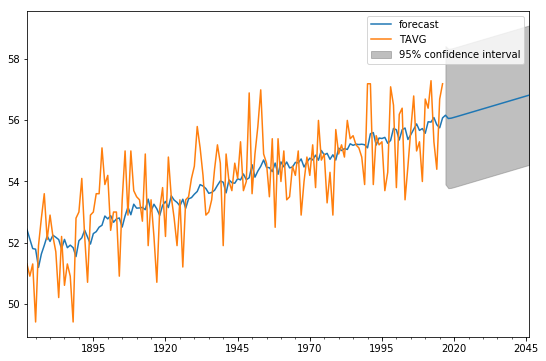

In [12]:
plt.rcParams['figure.figsize'] = (9, 6)
# Plot the original series and the forecasted series
res.predict(start='1872-01-01', end='2046-01-01')
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()